coast [WARNING]: Fill/clip continent option (-G) may not work for this projection.
coast [WARNING]: If the antipode (0/5.32671e-310) is in the ocean then chances are good it will work.
coast [WARNING]: Otherwise, avoid projection center coordinates that are exact multiples of 295 degrees.
coast [WARNING]: Fill/clip continent option (-G) may not work for this projection.
coast [WARNING]: If the antipode (0/5.32671e-310) is in the ocean then chances are good it will work.
coast [WARNING]: Otherwise, avoid projection center coordinates that are exact multiples of 255 degrees.


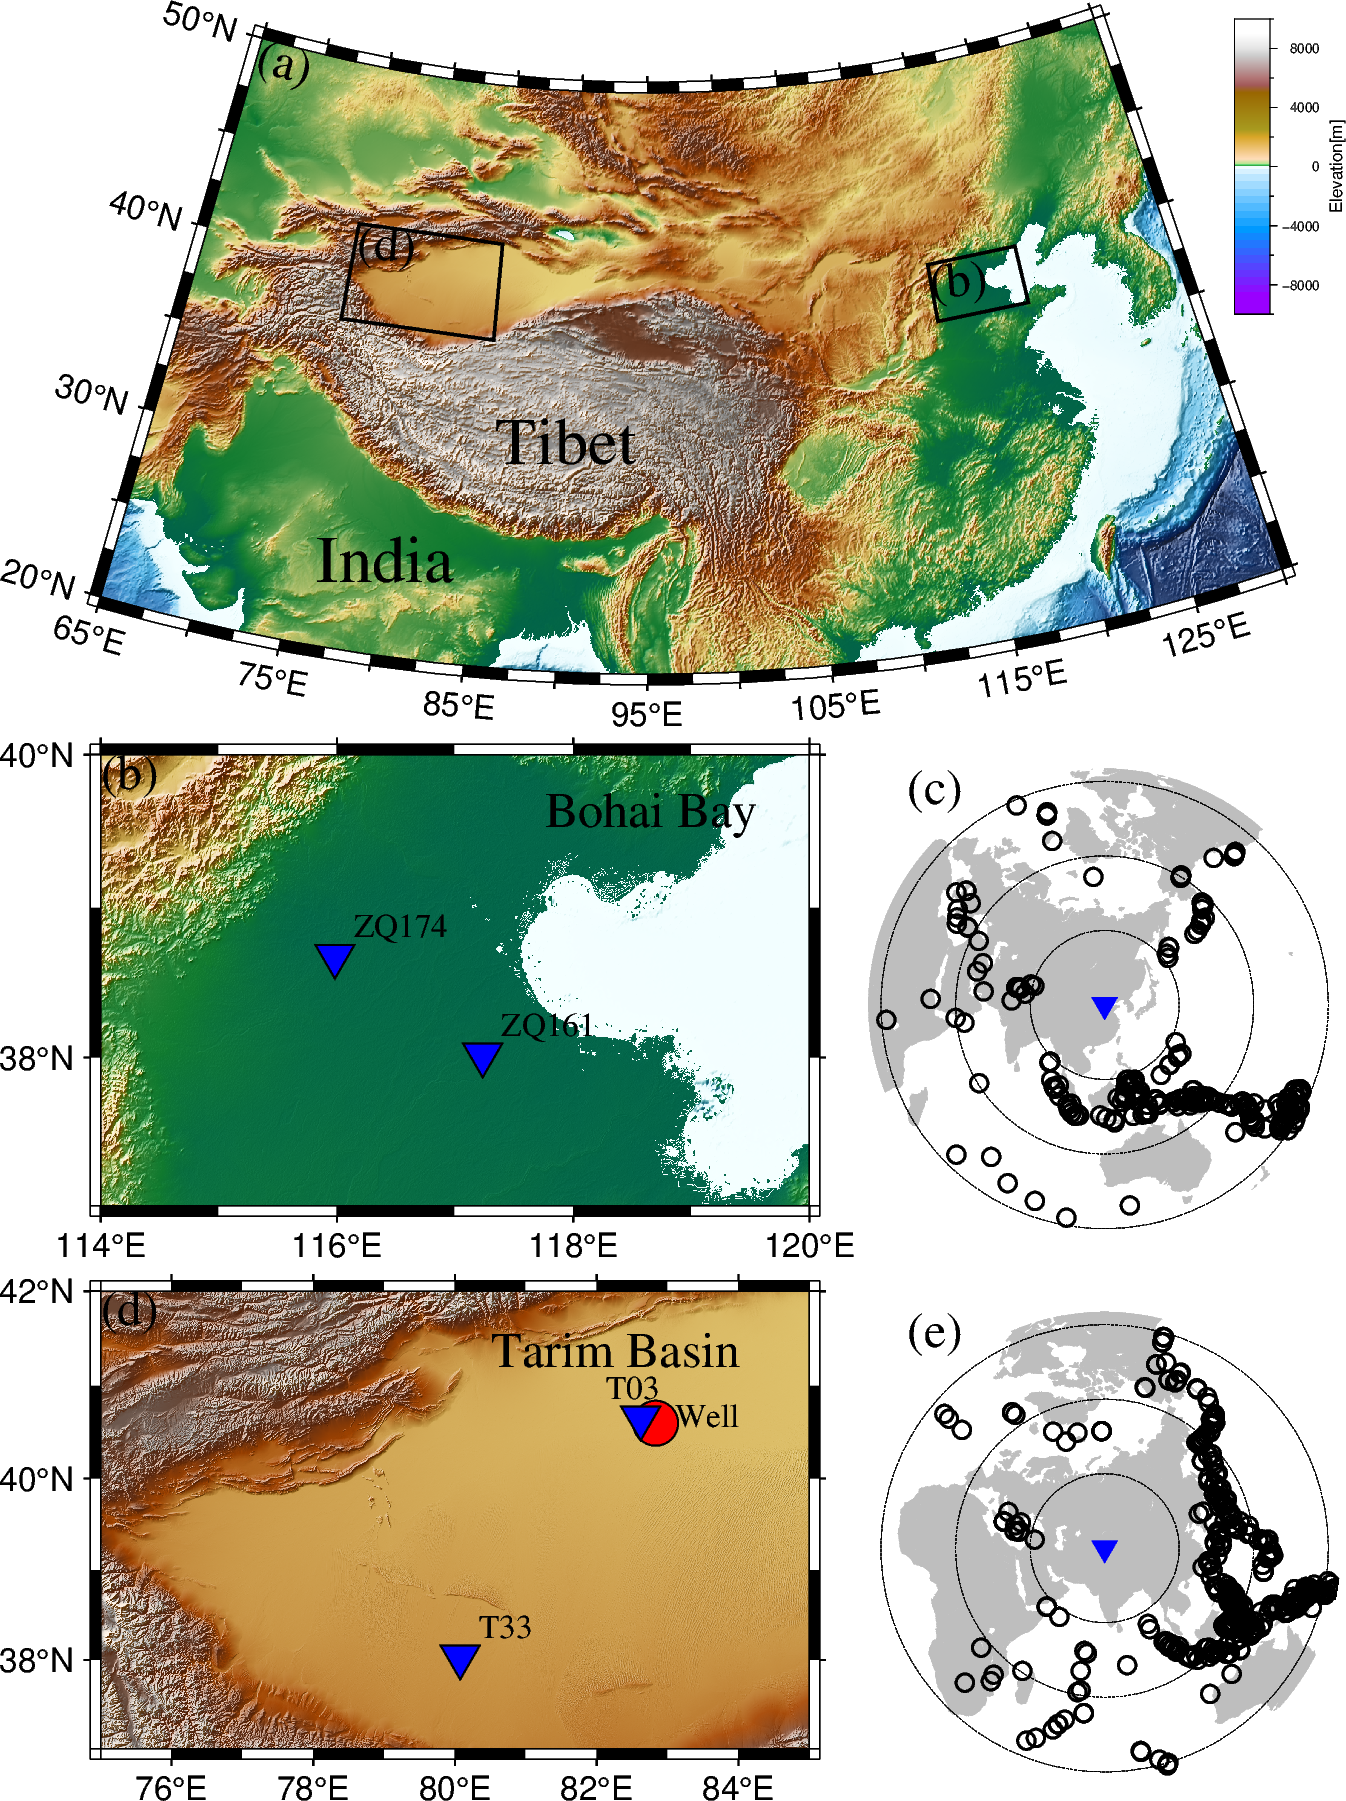

In [13]:
import pygmt
import numpy as np
# 设置参数
RLON = 95
RLAT = 32.5
lat1 = 25
lat2 = 40

Font = 'Times-Roman'
lat_min = 20
lat_max = 50
lon_min = 65
lon_max = 130

## Tarim box
lat1_min = 37
lat1_max = 42
lon1_min = 75
lon1_max = 85
position_subplot1 = np.array([
    [lon1_min, lat1_min],
    [lon1_max, lat1_min],
    [lon1_max, lat1_max],
    [lon1_min, lat1_max],
    [lon1_min, lat1_min]
])

# Bohai bay box
lat2_min = 37
lat2_max = 40
lon2_min = 114
lon2_max = 120
position_subplot2 = np.array([
    [lon2_min, lat2_min],
    [lon2_max, lat2_min],
    [lon2_max, lat2_max],
    [lon2_min, lat2_max],
    [lon2_min, lat2_min]
])



# 设置GMT参数
pygmt.config(MAP_FRAME_TYPE='fancy',
             MAP_TICK_LENGTH_PRIMARY='4p',
             FONT_ANNOT_PRIMARY='8p',
             MAP_FRAME_PEN='0.5p,black')

# 开始创建图形
fig = pygmt.Figure()

# 主地图

#https://www.generic-mapping-tools.org/mirrors/
pygmt.config(GMT_DATA_SERVER="http://china.generic-mapping-tools.org")
fig.grdimage(grid='@earth_relief_02m',
            projection=f'L{RLON}/{RLAT}/{lat1}/{lat2}/10c',
            region=[lon_min, lon_max, lat_min, lat_max],
            frame=['WSen', 'a5f2.5'],
            shading=True)

# 添加文本 (a)
fig.text(x=lon_min, y=lat_max, 
         text='(a)', 
         offset='0c/0c',
         font=f'12p,{Font},black',
         justify='TL',
         angle=-15)

# 绘制Tarim和Bohai Bay的框
fig.plot(data=position_subplot1, pen='0.01i,black')
fig.plot(data=position_subplot2, pen='0.01i,black')

# 添加框标签
fig.text(x=lon1_min, y=lat1_max, 
         text='(d)', 
         offset='0c/0c',
         font=f'12p,{Font},black',
         justify='TL',
         angle=-5)

fig.text(x=lon2_min, y=lat2_max, 
         text='(b)', 
         offset='0c/0c',
         font=f'12p,{Font},black',
         justify='TL',
         angle=5)

# 添加地区标签
fig.text(x=90, y=32, text='Tibet', font=f'16p,{Font},black', justify='CM')
fig.text(x=80, y=25, text='India', font=f'16p,{Font},black', justify='CM')

# 绘制颜色条
pygmt.config(FONT_ANNOT_PRIMARY='8p', FONT_LABEL='10p')
fig.colorbar(position='jTR+jTL+w2.5c/0.3c+o-0.4c/0.0c+v',
             frame='a4000f2000+lElevation[m]',
             cmap='globe')

pygmt.config(FONT_ANNOT_PRIMARY='8p')

# 绘制Bohai Bay地理图
fig.shift_origin(yshift='-4.5c')
# with pygmt.config(GMT_DATA_SERVER="https://oceania.generic-mapping-tools.org"):
fig.grdimage(grid='@earth_relief_15s',
            projection=f'M{RLON}/{RLAT}/6c',
            region=[lon2_min, lon2_max, lat2_min, lat2_max],
            frame=['WSen', 'a2f1'],
            shading=True)

# 添加文本 (b)
fig.text(x=lon2_min, y=lat2_max, 
         text='(b)', 
         font=f'12p,{Font},black',
         justify='TL')

# 绘制站点
stations_bohai = np.array([
    [117.233299, 38.016701],
    [115.983299, 38.674999]
])
fig.plot(x=stations_bohai[:, 0], y=stations_bohai[:, 1], 
         style='i0.15i', fill='blue', pen='0.005i,black')

# 添加站点标签
fig.text(x=stations_bohai[0, 0], y=stations_bohai[0, 1], 
         text='ZQ161', 
         offset='0.16c/0.16c',
         font=f'8p,{Font},black',
         justify='BL')
fig.text(x=stations_bohai[1, 0], y=stations_bohai[1, 1], 
         text='ZQ174', 
         offset='0.16c/0.16c',
         font=f'8p,{Font},black',
         justify='BL')

fig.text(x=118.5, y=39.4, 
         text='Bohai Bay', 
         offset='0.16c/0.16c',
         font=f'12p,{Font},black',
         justify='BC')

# 绘制全球视角
RLON = 115
RLAT = 38
fig.shift_origin(xshift='6.5c', yshift='-0.3c')
fig.coast(projection=f'E{RLON}/{RLAT}/95/4c',
          region='g',
          land='gray',
          water='white',
          resolution='f',
          area_thresh=10000)

# 绘制中心点
fig.plot(x=RLON, y=RLAT, style='i0.1i', fill='blue')

# 绘制同心圆
radii = [6668, 13336, 20004]
for radius in radii:
    fig.plot(data=np.array([[RLON, RLAT, radius]]), 
             style='E-', pen='0.08p,black,--')

fig.plot(data=np.array([[RLON, RLAT, 21334]]), 
         style='E-', pen='0.15p,black')

# 这里需要加载地震数据

lats,lons,mags = np.loadtxt("seismic_data/ZQ_catalog_30_90.csv",delimiter=",",usecols=[1,2,4],unpack=True)
indexs = mags>5.5
lats = lats[indexs]
lons = lons[indexs]
fig.plot(x=lons,y=lats,pen='0.6p,black',style='c0.15c')
# awk '{ FS="," } $5 > 5.5 { print $3 " " $2 }' seismic_data/ZQ_catalog_30_90.csv
# 使用pandas读取和处理数据的示例：
# import pandas as pd
# df = pd.read_csv('seismic_data/ZQ_catalog_30_90.csv')
# events = df[df.iloc[:, 4] > 5.5]  # 第5列>5.5
# fig.plot(x=events.iloc[:, 2], y=events.iloc[:, 1], style='c0.15c', pen='0.6p,black')

# 添加文本 (c)
fig.text(x=RLON, y=RLAT, 
         text='(c)', 
         offset='-1.2c/1.7c',
         font=f'12p,{Font},black',
         justify='BR')

# 绘制Tarim Basin地理图
fig.shift_origin(yshift='-4.3c', xshift='-6.5c')
# with pygmt.config(GMT_DATA_SERVER="https://oceania.generic-mapping-tools.org"):
fig.grdimage(grid='@earth_relief_15s',
            projection=f'M{RLON}/{RLAT}/6c',
            region=[lon1_min, lon1_max, lat1_min, lat1_max],
            frame=['WSen', 'a2f1'],
            shading=True)

# 添加文本 (d)
fig.text(x=lon1_min, y=lat1_max, 
         text='(d)', 
         font=f'12p,{Font},black',
         justify='TL')


##VSP
VSPs = np.array(
    [
        [82.6367564819522, 40.54257699295764],
        [82.83146924250127, 40.59638143288308]
    ]
)
fig.plot(x=VSPs[1, 0], y=VSPs[1, 1], 
         style='c0.15i', fill='red', pen='0.005i,black')

fig.text(x=VSPs[1, 0], y=VSPs[1, 1], 
         text='Well', 
         offset='0.16c/0.16c',
         font=f'8p,{Font},black',
         justify='TL')

# 绘制Tarim站点
stations_tarim = np.array([
    [80.074612, 38.034245],
    [82.61882, 40.651367]
])
fig.plot(x=stations_tarim[:, 0], y=stations_tarim[:, 1], 
         style='i0.15i', fill='blue', pen='0.005i,black')

# 添加站点标签
fig.text(x=stations_tarim[0, 0], y=stations_tarim[0, 1], 
         text='T33', 
         offset='0.16c/0.16c',
         font=f'8p,{Font},black',
         justify='BL')
fig.text(x=stations_tarim[1, 0], y=stations_tarim[1, 1], 
         text='T03', 
         offset='0.16c/0.16c',
         font=f'8p,{Font},black',
         justify='BR')




fig.text(x=82, y=41, 
         text='Tarim Basin', 
         offset='0.16c/0.16c',
         font=f'12p,{Font},black',
         justify='BC')

# 绘制第二个全球视角
RLON = 75
RLAT = 40
fig.shift_origin(xshift='6.5c', yshift='-0.3c')
fig.coast(projection=f'E{RLON}/{RLAT}/95/4c',
          region='g',
          land='gray',
          water='white',
          resolution='f',
          area_thresh=10000)

# 绘制中心点
fig.plot(x=RLON, y=RLAT, style='i0.1i', fill='blue')

# 绘制同心圆
for radius in [6668, 13336, 20004]:
    fig.plot(data=np.array([[RLON, RLAT, radius]]), 
             style='E-', pen='0.08p,black,--')

fig.plot(data=np.array([[RLON, RLAT, 21334]]), 
         style='E-', pen='0.15p,black')

# 这里需要加载TASTE地震数据
lats,lons,mags = np.loadtxt("seismic_data/TASTEselected_events_mg5.0.txt",delimiter=",",usecols=[1,2,4],unpack=True)
indexs = mags>5.5
lats = lats[indexs]
lons = lons[indexs]
fig.plot(x=lons,y=lats,pen='0.6p,black',style='c0.15c')
# awk '{ FS="," } $5 > 5.5 { print $3 " " $2 }' seismic_data/TASTEselected_events_mg5.0.txt

# 添加文本 (e)
fig.text(x=RLON, y=RLAT, 
         text='(e)', 
         offset='-1.2c/1.7c',
         font=f'12p,{Font},black',
         justify='BR')

# 保存图形
fig.savefig('bohai_and_tarim_basin.jpg', dpi=900)
fig.show()